# ***Installation***

In [1]:
!pip install flaml[notebook]

# ***Importing Libraries and Dependencies***

In [2]:
import sklearn.datasets
import sklearn.metrics
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ***Data Loading***

In [3]:
X , y = sklearn.datasets.load_breast_cancer(return_X_y=True)

# ***Train Test Split***

In [4]:
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

# ***Initialize AutoML instance***

In [5]:
# Initialize an AutoML instance
automl = AutoML()

# ***Specify Settings***

In [6]:
automl_settings = {
    "time_budget": 240,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "breast_cancer.log",
    "seed": 42,    # random seed
}


# ***Fit***

In [8]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl: 10-05 09:44:17] {1432} INFO - Evaluation method: cv
[flaml.automl: 10-05 09:44:17] {1478} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 10-05 09:44:17] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'lrl1']
[flaml.automl: 10-05 09:44:17] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-05 09:44:17] {1866} INFO - Estimated sufficient time budget=588s. Estimated necessary time budget=11s.
[flaml.automl: 10-05 09:44:17] {1944} INFO -  at 0.1s,	estimator lgbm's best error=0.0846,	best estimator lgbm's best error=0.0846
[flaml.automl: 10-05 09:44:17] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-05 09:44:17] {1944} INFO -  at 0.2s,	estimator lgbm's best error=0.0846,	best estimator lgbm's best error=0.0846
[flaml.automl: 10-05 09:44:17] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-05 09:44:17] {1944} INFO -  at 0.2s,	estimator lgbm's best error=0.0846,	b

# ***Statistics***

In [9]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 8, 'max_features': 0.9702733874291781, 'max_leaves': 20, 'criterion': 'entropy'}
Best accuracy on validation data: 0.9788
Training duration of best run: 1.258 s


In [10]:
automl.model.estimator

ExtraTreesClassifier(criterion='entropy', max_features=0.9702733874291781,
                     max_leaf_nodes=20, n_estimators=8, n_jobs=-1)

# ***Saving Model***

In [12]:
''' pickle and save the automl object '''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

# ***Predictions***

In [11]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
True labels [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1]


In [13]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.951048951048951
roc_auc = 0.981198347107438
log_loss = 0.15589196095183683


# ***Log History***

In [21]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 426, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'xgboost', 'Current Sample': 426, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'xgboost', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.9999999999999993, 'learning_rate': 0.09999999999999995, 'subsample':

# ***Learning Curve***

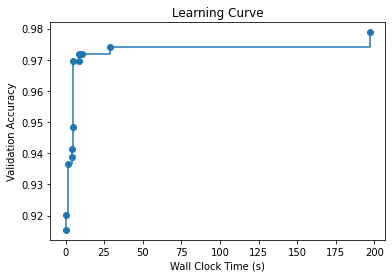

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()